In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

<h2 id="Data_Import">1. Data Import</h2>

In [2]:
data = pd.read_csv('auto.csv')


<h2 id="Data_Understanding">2. Data Understanding and Manipulation</h2>

<h4>Show data header</h4>


In [3]:
data.head(6)

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,5,2,?,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


<h4>Show columns names</h4>

In [4]:
print(data.columns)

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')


<h4>Drop the first irrelevant column</h4>

In [5]:
data.drop('Unnamed: 0', axis =1 , inplace = True) 

Check if the column is dropped

In [6]:
print(data.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')



<h4>Fix columns names</h4>

Many columns in the dataset have long names, we will change them to be shorter and better describtive.

In [7]:
data.columns = (["symboling","normalized-losses","maker",'fuel-type',"aspiration","doors-num","body-style","drive-wheels",'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak', 'city-mpg', 'highway', 'price',
      ])

Check the new columns names

In [8]:
print(data.columns)

Index(['symboling', 'normalized-losses', 'maker', 'fuel-type', 'aspiration',
       'doors-num', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak', 'city-mpg', 'highway',
       'price'],
      dtype='object')


<h4>Data information</h4>


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
maker                205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
doors-num            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

<h4>Check to number of rows and columns</h4>

In [10]:
print("the number of (rows, columns) is:",data.shape)

the number of (rows, columns) is: (205, 26)


<h2 id="Data_Processing">3. Data Processing</h2>

<h3> Dealing with missing data</h3>

<h4> 1) Identify missing data</h4>

In [11]:
# replace "?" to NaN
data.replace("?", np.nan, inplace = True)
data.head(5)

,symboling,normalized-losses,maker,fuel-type,aspiration,doors-num,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak,city-mpg,highway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
#Count missing values in each column
print(data.isnull().sum())

symboling             0
normalized-losses    41
maker                 0
fuel-type             0
aspiration            0
doors-num             2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak                  2
city-mpg              0
highway               0
price                 4
dtype: int64


[Text(33.0, 0.5, 'Data Points'),
 Text(0.5, 15.0, 'Columns'),
 Text(0.5, 1.0, 'Missing Data')]

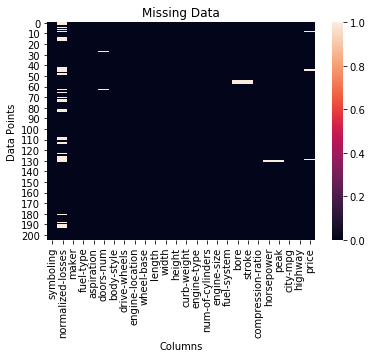

In [13]:
sns.heatmap(data.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

Based on the summary above, each column has 205 rows of data,
7/26 of our columns have missing data points, the maximum percentage of missing data is in the 'normalized-losses' column, and it is 20% (41/205)
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"doors num": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

<h4>2) Replace missing data</h4>

There are different methods to replace the data. In our dataset, we will replace those missing values based on the data type (numerical or categorical) using the methods presented below. We will apply each method to many different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"doors-num": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason:four doors is most frequent type, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

In [14]:
# calculate the average of the columns
avg_norm_loss = data["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

avg_stroke = data["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

avg_bore=data['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

avg_horsepower = data['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

avg_peakrpm=data['peak'].astype('float').mean(axis=0)
print("Average peak:", avg_peakrpm)

Average of normalized-losses: 122.0
Average of stroke: 3.255422885572139
Average of bore: 3.3297512437810943
Average horsepower: 104.25615763546799
Average peak: 5125.369458128079


In [15]:
# replace "NaN" by mean value
data["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
data["stroke"].replace(np.nan, avg_stroke, inplace = True)
data["bore"].replace(np.nan, avg_bore, inplace=True)
data['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
data['peak'].replace(np.nan, avg_peakrpm, inplace=True)

In [16]:
data['doors-num'].describe()

count      203
unique       2
top       four
freq       114
Name: doors-num, dtype: object

In [17]:
data['doors-num'].value_counts().to_frame()

,doors-num
four,114
two,89


We can see that four doors are the most common

In [18]:
#replace the missing 'doors-num' values by the most frequent 
data["doors-num"].replace(np.nan, "four", inplace=True)

In [19]:
# drop whole rows with NaN in "price" column
data.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
data.reset_index(drop=True, inplace=True)

In [20]:
# check missing values in each column
print(data.isnull().sum())

symboling            0
normalized-losses    0
maker                0
fuel-type            0
aspiration           0
doors-num            0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak                 0
city-mpg             0
highway              0
price                0
dtype: int64


<h3> Drop the duplicate rows</h3>

In [21]:
# detect rows containing duplicate data
duplicate_rows = data[data.duplicated()]
print('number of duplicate rows: (dup rows, columns)', duplicate_rows.shape)

number of duplicate rows: (dup rows, columns) (0, 26)


In our dataset, we don't have duplicate rows.

<h3> Correct data format</h3>

In [22]:
# check the data types for each column 
data.dtypes.to_frame()

,0
symboling,int64
normalized-losses,object
maker,object
fuel-type,object
aspiration,object
doors-num,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


As we can see above, some columns are in the correct data type except for 'bore', 'stroke', 'price', 'peak'and 'normalized-losses' are identified as object type; however, we should expect them to be of the type 'float' or 'int'.

Thus, We need to convert them into float or int type. 

In [23]:
# convert data types to proper format
data[["bore", "stroke" , "price" , "peak"]] = data[["bore", "stroke" , "price" , "peak"]].astype("float")
data[["normalized-losses","horsepower"]] = data[["normalized-losses", "horsepower"]].astype("int")

In [24]:
# check the new data types 
data.dtypes

symboling              int64
normalized-losses      int32
maker                 object
fuel-type             object
aspiration            object
doors-num             object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak                 float64
city-mpg               int64
highway                int64
price                float64
dtype: object

<h3> Dealing with outliers</h3>

<h4> 1) Identify outliers</h4>

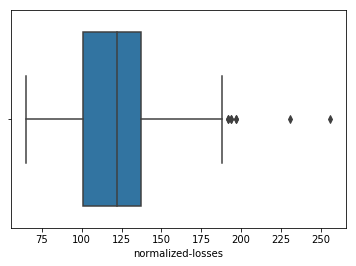

In [25]:
#sns.boxplot(x=data[['normalized-losses', 'maker']]);
sns.boxplot(x=data['normalized-losses'])

In [26]:
dfw = data['normalized-losses']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [27]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

9      192
10     192
101    194
102    194
103    231
174    197
175    197
186    256
Name: normalized-losses, dtype: int32

<h4> 2) Delete outliers</h4>

In our case, we will not delete the outliers.

<h3> Data standardization</h3>

We will apply data transformation to transform mpg into L/100km in the 'city-mpg' column.

The formula for unit conversion is:  L/100km = 235 / mpg



In [28]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
data['city-L/100km'] = 235/data["city-mpg"]

# check your transformed data 
data.head()

,symboling,normalized-losses,maker,fuel-type,aspiration,doors-num,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak,city-mpg,highway,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


<h3> Data normalization</h3>

To perform normalization, we choose to scale the columns "length", "width" and "height" using simple feature scaling

In [29]:
# replace (original value) by (original value)/(maximum value)
data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max() 
# show the scaled columns
data[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<h3> Binning</h3>


In our dataset, as mentionned below, the 'horsepower' is a real valued variable ranging from 48 to 262, it has 59 unique values.

We will segment this column into 3 categorical types (high horsepower, medium horsepower, and little horsepower).


In [30]:
# 'horsepower' information
print("the unique values are:",data['horsepower'].nunique())
print("the min value is:",data['horsepower'].min())
print("the max value is:",data['horsepower'].max())

the unique values are: 59
the min value is: 48
the max value is: 262


In [31]:
# convert data to correct format 
data["horsepower"]=data["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

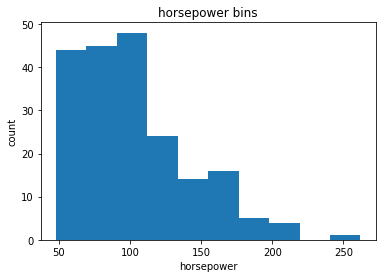

In [32]:
# plot the histogram of horspower, to see its distribution 
plt.pyplot.hist(data["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [33]:
# create bins 
bins = np.linspace(min(data["horsepower"]), max(data["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
data['horsepower-binned'] = pd.cut(data['horsepower'], bins, labels=group_names, include_lowest=True )
data[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [34]:
# see the number of vehicles in each bin
data["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

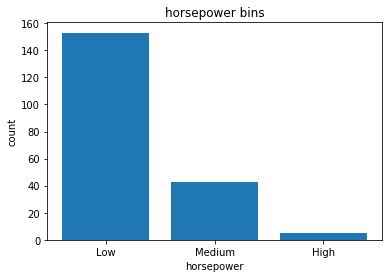

In [35]:
# plot the distribution of each bin
pyplot.bar(group_names, data["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

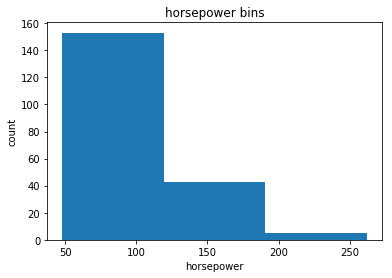

In [36]:
# visualize the distribution of bins
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(data["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<h3> Converting categorical values</h3>

We will assign numerical values to different categories of 'fuel-type' using dummy variable

In [37]:
data['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [38]:
dummy_variable_1 = pd.get_dummies(data["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [39]:
# merge data frame "df" and "dummy_variable_1" 
data = pd.concat([data, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
data.drop("fuel-type", axis = 1, inplace=True)
data.head()


,symboling,normalized-losses,maker,aspiration,doors-num,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak,city-mpg,highway,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,0,1


<h2 id="EDA">4. EDA: Exploratory Data Analysis</h2>

<h3> A) Decriptive Statical Analysis </h3>

The <b>describe</b> function  will compute basic statistics for all continuous variables as:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>

In [40]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak,city-mpg,highway,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


The default setting of "describe" skips variables of type object. We will apply this method on the variables of type 'object'

In [41]:
data.describe(include=['object'])

,maker,aspiration,doors-num,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,165,115,94,118,198,145,157,92


<h3> B) Analysing Indivividual Features </h3>

<h4><u>Continuous numerical variables</u></h4> 

In [42]:
# explore 'engine-size' variable
data['engine-size'].nunique()

43

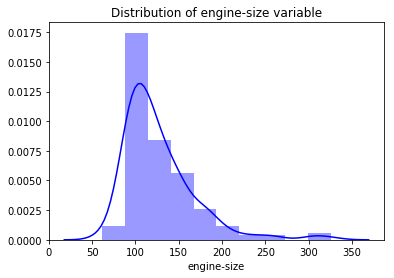

In [43]:
# view the distribution of 'engine-size'variable
import matplotlib.pyplot as plt
f, ax = plt.subplots()
x = data['engine-size']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of engine-size variable")
plt.show()

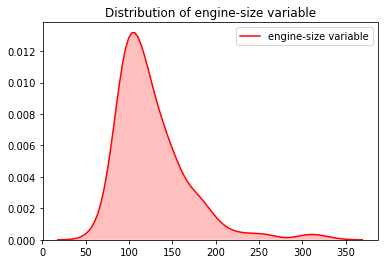

In [44]:
f, ax = plt.subplots()
x = data['engine-size']
x = pd.Series(x, name="engine-size variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of engine-size variable")
plt.show()

***From the distplot, for the value of 'engine-size', the most numbers are ranged from 70 to 120.***

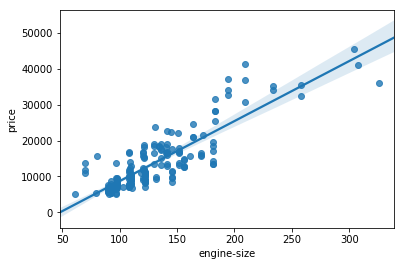

In [45]:
# the scatterplot of "engine-size" and "price" 
sns.regplot(x="engine-size", y="price", data=data)


<p>As "the engine-size" goes up, the "price" goes up and the regression line is almost a perfect diagonal line: this indicates a <b>positive linear relationship</b> between these two variables.</p>

In [46]:
# explore 'engine-size' variable
data['highway'].nunique()

30

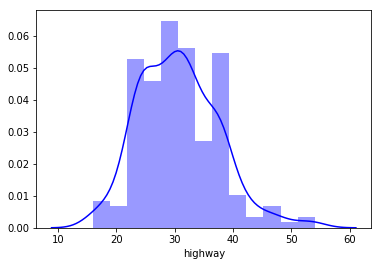

In [47]:
sns.distplot(data['highway'], color='blue')

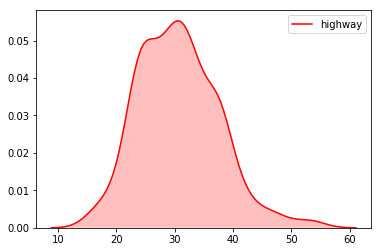

In [48]:
sns.kdeplot(data['highway'], shade=True, color='red')

***From the distplot, for the value of 'highway', the most numbers are ranged from 25 to 35.***

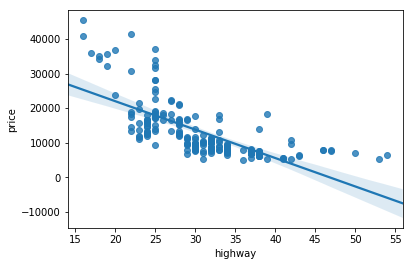

In [49]:
# the scatterplot of "highway" and "price" 
sns.regplot(x="highway", y="price", data=data)

<p>As the "highway" goes up, the price goes down: this indicates an <b>inverse/negative relationship</b> between these two variables. </p>

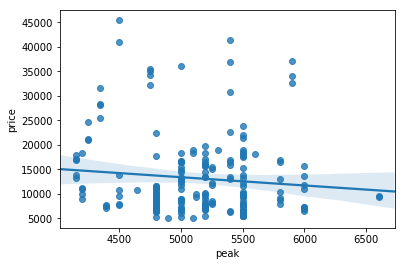

In [50]:
# the scatterplot of "peak" and "price" 
sns.regplot(x="peak", y="price", data=data)

<p>There's no clear relation between "Peak" and "Price" since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore "peak" does not seem like a reliable variable.</p>

<h4><u>Categorical variables</u></h4>

In [51]:
#Find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
categorical

['maker',
 'aspiration',
 'doors-num',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [52]:
#Preview categorical variables
data[categorical].head()

,maker,aspiration,doors-num,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,std,four,sedan,4wd,front,ohc,five,mpfi


In [53]:
#Frequency distribution of categorical variables
for var in categorical:
    freq=data[var].value_counts()/np.float(len(data))
    print(freq)

toyota           0.159204
nissan           0.089552
mazda            0.084577
honda            0.064677
mitsubishi       0.064677
volkswagen       0.059701
subaru           0.059701
peugot           0.054726
volvo            0.054726
dodge            0.044776
bmw              0.039801
mercedes-benz    0.039801
plymouth         0.034826
audi             0.029851
saab             0.029851
porsche          0.019900
alfa-romero      0.014925
jaguar           0.014925
chevrolet        0.014925
renault          0.009950
isuzu            0.009950
mercury          0.004975
Name: maker, dtype: float64
std      0.820896
turbo    0.179104
Name: aspiration, dtype: float64
four    0.572139
two     0.427861
Name: doors-num, dtype: float64
sedan          0.467662
hatchback      0.338308
wagon          0.124378
hardtop        0.039801
convertible    0.029851
Name: body-style, dtype: float64
fwd    0.587065
rwd    0.373134
4wd    0.039801
Name: drive-wheels, dtype: float64
front    0.985075
rear     0.

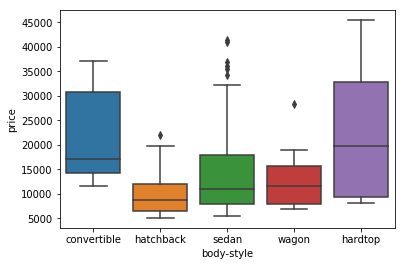

In [54]:
# the box plot of "body-style" and "price" 
sns.boxplot(x="body-style", y="price", data=data)

<p>We see that the distributions of price between the different body-style categories have a significant <b>overlap</b>, and so body-style would not be a good predictor of price. We also have <b>outliers</b> at the level of "hatchback", "sedan" and "wagon" body-style categories.</p>

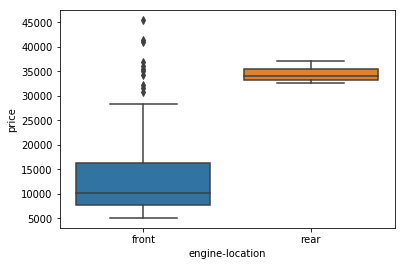

In [55]:
# the box plot of "engine-location" and "price" 
sns.boxplot(x="engine-location", y="price", data=data)

Since the distribution of price between these two engine-location categories (front and rear) are distinct enough, we can say the "engine-location" as a potential good predictor of price. We note the presence of may outliers in the "front" element of the category. 

<h3> C) Combinaison and Groupping </h3>

<h4>Example: Variables: Drive Wheels and Body Style vs Price</h4>

In [56]:
data['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

We want to know, on average, which type of drive wheel is most valuable

In [57]:
# dataframe
df_group_one = data[['drive-wheels','body-style','price']]
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


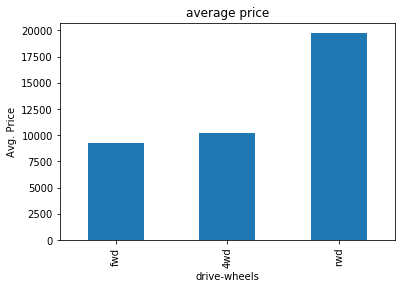

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure
data.groupby('drive-wheels')['price'].mean().sort_values().plot(kind='bar')
plt.title('average price')
plt.xlabel("drive-wheels")
plt.ylabel('Avg. Price')
plt.show()

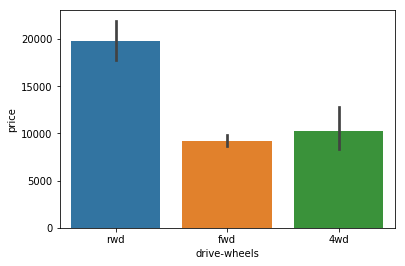

In [59]:
# the barplot of "drive-wheels" and "price"  
sns.barplot(x="drive-wheels", y="price", data=data)

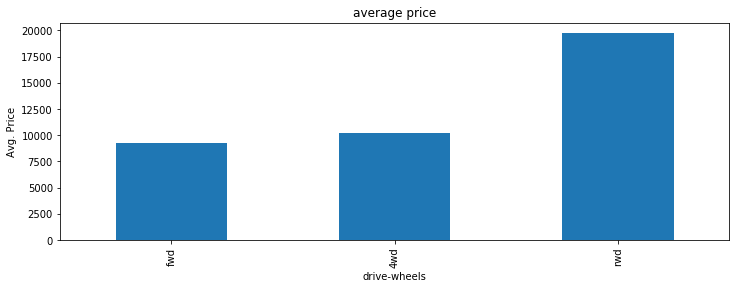

In [60]:
fig = plt.figure(figsize=(12, 4))
data.groupby('drive-wheels')['price'].mean().sort_values().plot(kind='bar')
plt.title('average price')
plt.xlabel("drive-wheels")
plt.ylabel('Avg. Price')
plt.show()

<p>The "rear-wheel drive (rwd)" vehicles are, on average, the most expensive, while "4-wheel (wd)" and "front-wheel (fwd)" are approximately the same in price.</p>

In [61]:
# grouping results
df_gptest = data[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [62]:
# pivot table
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [63]:
# fill missing values with 0
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

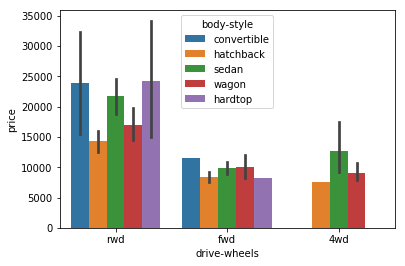

In [64]:
# the barplot
data.groupby(['drive-wheels','body-style'])['price'].mean()
sns.barplot(x="drive-wheels", y="price", hue="body-style", data=data)

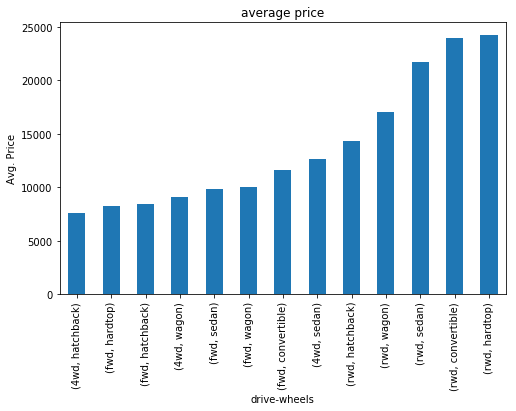

In [65]:
fig = plt.figure(figsize=(8, 5))
data.groupby(['drive-wheels','body-style'])['price'].mean().sort_values().plot(kind='bar')
plt.title('average price')
plt.xlabel("drive-wheels")
plt.ylabel('Avg. Price')
plt.show()

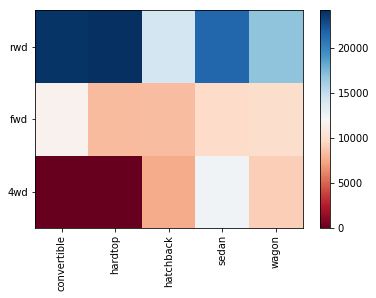

In [66]:
# heatmap
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

A high correlation between convertible-rwd, hardtop-rwd. Overally, we can say that rwd is correlated with all the body-styles.

<h3> D) Output Analysis (used for feature selection) </h3>

<h4><u>Numerical Data correlation</u></h4> 

In [67]:
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak,city-mpg,highway,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.241064,-0.241064


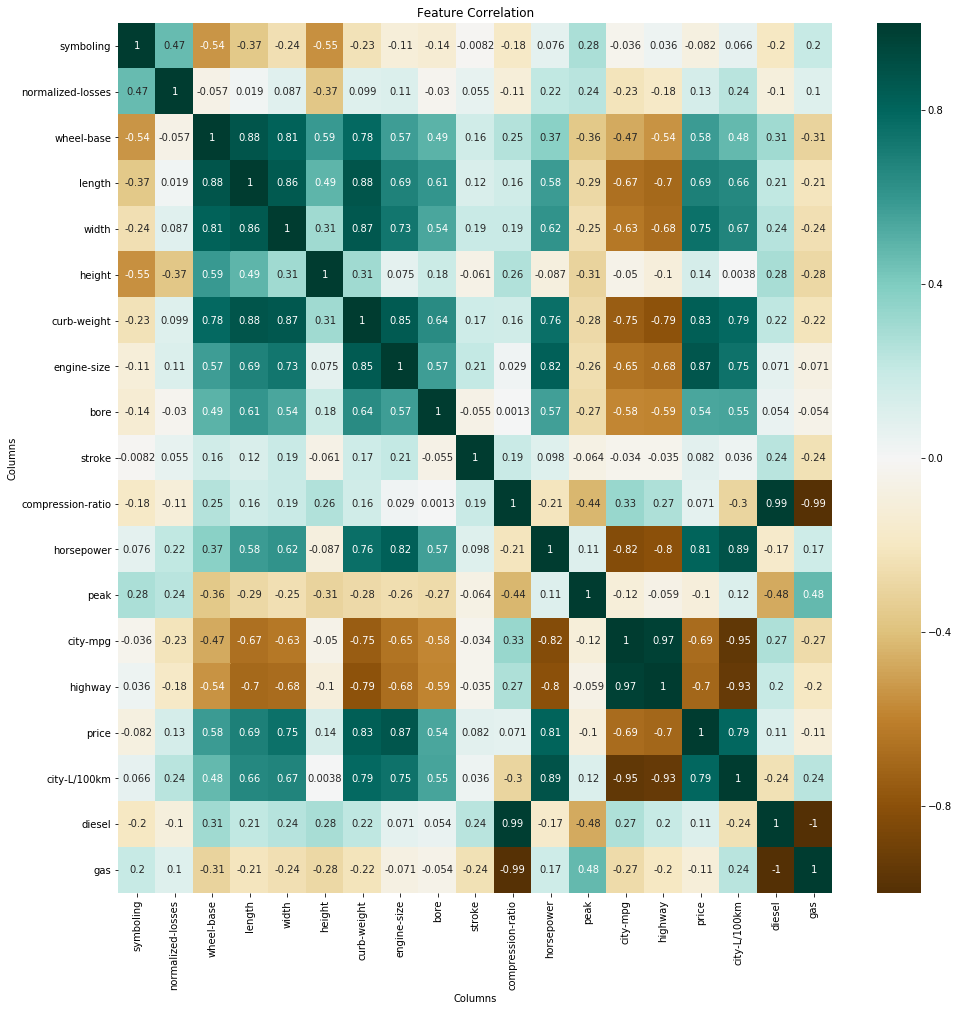

In [68]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

<h4><u>Numerical Data distribution</u></h4> 

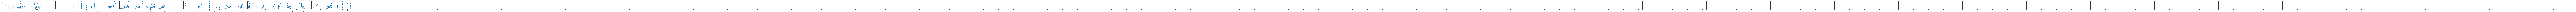

In [69]:
import seaborn as sns
pp = sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=data)
                  

<h4><u>Continuous numerical variables</u></h4> 

In order to judge the relation between the numerical variables and the output "price", we will use those two coefficient:
<ul>
    <li><b>The Pearson Correlation Coefficient</b></li>
    <li><b>The P-value</b></li>    
<ul>

The correlation matrix or the correlation heatmap gives us an idea about the "pearson correlation" between the variables.

The P-value is the probability value that the correlation between these two variables is statistically significant.

In [70]:
# Wheel-base vs Price
pearson_coef, p_value = stats.pearsonr(data['wheel-base'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20


<b>Conclusion:</b> since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

In [71]:
# Horsepower vs Price
pearson_coef, p_value = stats.pearsonr(data['horsepower'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.8096068016571052  with a P-value of P =  6.273536270651004e-48


<b>Conclusion:</b> <p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

In [72]:
# Length vs Price
pearson_coef, p_value = stats.pearsonr(data['length'], data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483642  with a P-value of P =  8.016477466158713e-30


<b>Conclusion:</b> Since the p-value is  <  0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691)

<h4><u>Categorical variables</u></h4>

In order to judge the relation between the categorical variables and the output "price", we will use those two coefficient:
<ul>
    <li><b>The F-test score</b></li>
    <li><b>The P-value</b></li>    
<ul>

F-test score: calculates how much the actual means deviate from the assumption.

P-value: tells how statistically significant is our calculated score value.

In [73]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [74]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [75]:
# ANOVA for drive-wheels
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results : F=", f_val, ", P =", p_val) 


ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23
ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333
ANOVA results : F= 0.665465750252303 , P = 0.41620116697845666


Overally, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance we can say that the three tested groups are correlated

<h2 id="Feature_Selection">5. Feature Selection</h2>

<p>According to the EDA on some variables, we now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Horsepower</li>
    <li>Wheel-base</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<h2 id="Model Development">6. Model Development</h2>

<p>In this section we will:</p>
<ul>
    <li>1. Select the dataframe</li>
    <li>2. Transform 'Drive-wheels' column into numerical values</li>
    <li>3. Split data set into training and testing parts (80/20)</li>
    <li>4. Scale both training and testing input data</li>
    <li>5. Train the regression model</li>
    
</ul>


In [76]:
X = data[['length','horsepower','wheel-base','drive-wheels']]
Y = data['price']

In [77]:
X = pd.concat([X,pd.get_dummies(data['drive-wheels'], prefix='drive-wheels')], axis=1).drop(['drive-wheels'],axis=1)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
length              201 non-null float64
horsepower          201 non-null int32
wheel-base          201 non-null float64
drive-wheels_4wd    201 non-null uint8
drive-wheels_fwd    201 non-null uint8
drive-wheels_rwd    201 non-null uint8
dtypes: float64(2), int32(1), uint8(3)
memory usage: 4.6 KB
None


In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [79]:
# Scale both training and testing input data

X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (160, 6) (160,)
Test set: (41, 6) (41,)


C:\Users\rahmaa\Anaconda3\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rahmaa\Anaconda3\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by the scale function.
  """


In [80]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<h2 id="Model_Evaluation">7. Model Evaluation</h2>

<h4> Predictions</h4>

In [81]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print(len(y_train_pred))
print(len(y_test_pred))

160
41


<h4> Evaluation</h4>

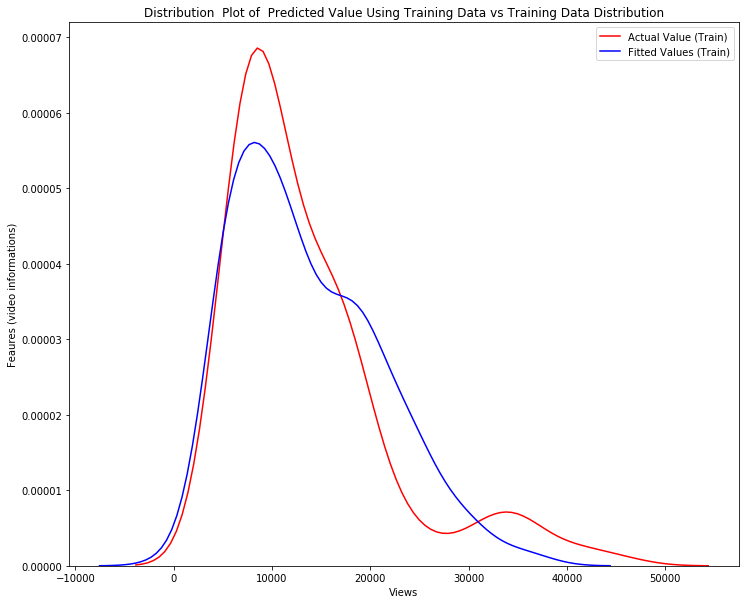

In [82]:
#distribution plot:
import matplotlib.pyplot as plt
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Y_train, hist=False, color="r", label="Actual Value (Train)")
sns.distplot(y_train_pred, hist=False, color="b", label="Fitted Values (Train)" , ax=ax1)


plt.title('Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution')
plt.xlabel('Views')
plt.ylabel('Feaures (video informations)')

plt.show()
plt.close()

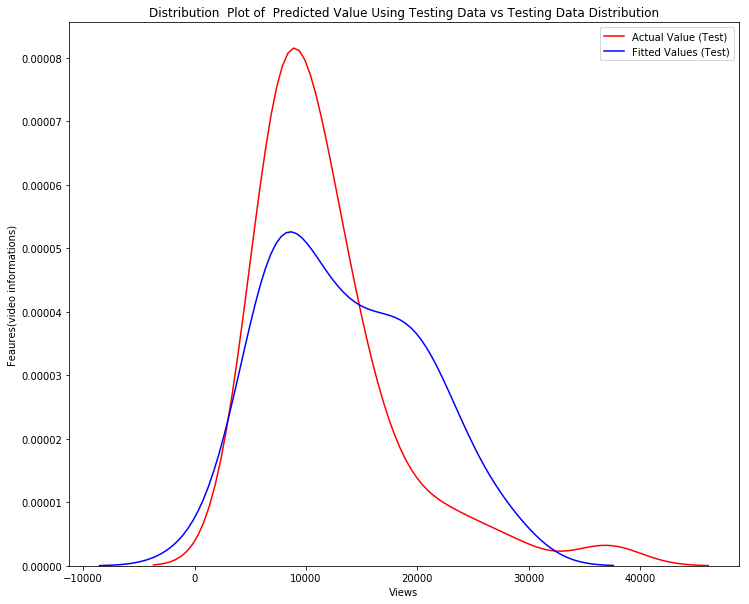

In [83]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value (Test)")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values (Test)" , ax=ax1)


plt.title('Distribution  Plot of  Predicted Value Using Testing Data vs Testing Data Distribution')
plt.xlabel('Views')
plt.ylabel('Feaures(video informations)')

plt.show()
plt.close()

In [84]:
print('Multiple Linear Regression Performance:')
print('MAE:', metrics.mean_absolute_error(Y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))
print('R2_Score:', metrics.r2_score(Y_test, y_test_pred))

Multiple Linear Regression Performance:
MAE: 3481.410930120572
RMSE: 4623.673667201005
R2_Score: 0.4732588804454504
